**Observable Trends**


    1) As the number of total rides per city increases, the city type transitions from likely being rural to urban. This may be due to having more populated areas in urban cities, and therefore, more customers.

    2) As the average fare increases, the city type transitions from likely being urban to rural. This may be due to rural customers' destinations being further since the city areas are small enough to walk; requiring rides when going between cities.

    3) A larger count of drivers is associated with more urban-like cities.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_df = pd.merge(ride_df,city_df,on="city", how="left")
# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

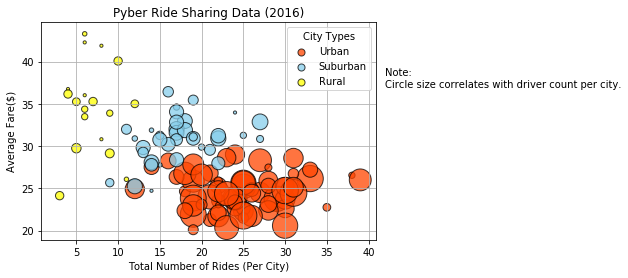

In [2]:
# Obtain the x and y coordinates for each of the three city types
avg_fare = merged_df.groupby(["city","type"], as_index=False).mean()
total_rides = merged_df["city"].value_counts().reset_index()
total_rides = pd.DataFrame(total_rides).rename(columns={"index":"city", "city":"total"})
total_rides
full = pd.merge(avg_fare[:], total_rides,on="city",how="left")
full.head()
# Build the scatter plots for each city types
Urban = plt.scatter(full["total"].loc[full["type"]=="Urban"],
                     full["fare"].loc[full["type"]=="Urban"],
                     s=full["driver_count"].loc[full["type"]=="Urban"]*10,
                     marker="o",edgecolors="black",alpha=0.75,c="orangered")

Suburban = plt.scatter(full["total"].loc[full["type"]=="Suburban"],
                     full["fare"].loc[full["type"]=="Suburban"],
                     s=full["driver_count"].loc[full["type"]=="Suburban"]*10,
                     marker="o",edgecolors="black",alpha=0.75,c="skyblue")

Rural = plt.scatter(full["total"].loc[full["type"]=="Rural"],
                     full["fare"].loc[full["type"]=="Rural"],
                     s=full["driver_count"].loc[full["type"]=="Rural"]*10,
                     marker="o",edgecolors="black",alpha=0.75,c="yellow")
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
legend = plt.legend(handles=[Urban, Suburban, Rural], 
                    labels = ["Urban","Suburban","Rural"],title = "City Types", loc="upper right")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
# Incorporate a text label regarding circle size
plt.text(42,37,s="Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("Images/pyber_ride_sharing.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

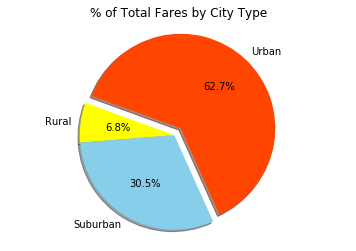

In [4]:
# Calculate Type Percents
total_fares = merged_df.groupby("type",as_index=False).sum()
# Build Pie Chart
plt.pie(total_fares["fare"],explode=[0,0,0.1],labels=total_fares["type"],
        colors = ["yellow", "skyblue","orangered"], autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/total_fares.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

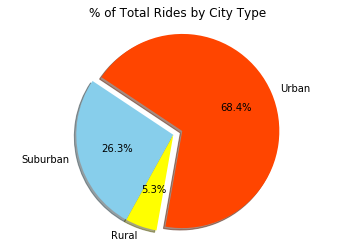

In [6]:
# Calculate Ride Percents
total_rides = merged_df["type"].value_counts().reset_index()
# Build Pie Chart
plt.pie(total_rides["type"],explode=[0.1,0,0],labels=total_rides["index"],
        colors = ["orangered", "skyblue","yellow"], autopct="%1.1f%%",shadow=True,startangle=260)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/total_rides.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

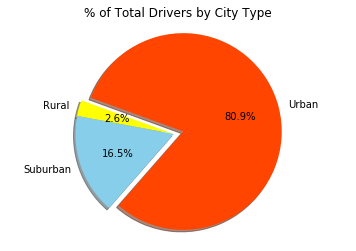

In [8]:
# Calculate Driver Percents
total_drivers = full.groupby("type").sum().reset_index()
# Build Pie Charts
plt.pie(total_drivers["driver_count"],explode=[0,0,0.1],labels=total_drivers["type"],
        colors = ["yellow", "skyblue","orangered"], autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Images/total_drivers.png")

In [9]:
# Show Figure
plt.show()